<a href="https://colab.research.google.com/github/SeyitKoyuncu/PyTorch-Self-Studying/blob/main/PyTorch_3(Neural_Network_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with PyTorch

## 1. Make classification data and get it ready

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [4]:
print(len(X), len(y))

1000 1000


In [5]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [6]:
# Make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

print(circles.head(10))

         X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
5 -0.479646  0.676435      1
6 -0.013648  0.803349      1
7  0.771513  0.147760      1
8 -0.169322 -0.793456      1
9 -0.121486  1.021509      0


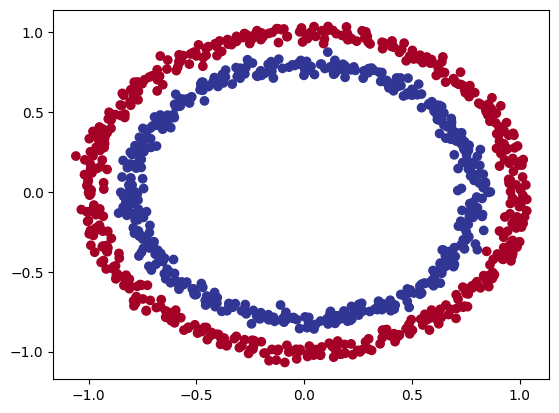

In [7]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu)

# 1.1 Check input and output shapes

In [8]:
print(X.shape, y.shape)

(1000, 2) (1000,)


In [9]:
# Example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y : {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y : 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [10]:
import torch
print(torch.__version__)

2.0.1+cu118


In [11]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [12]:
print(X[:5], y[:5])

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]]) tensor([1., 1., 1., 1., 0.])


In [13]:
print(X.dtype, y.dtype, type(X))

torch.float32 torch.float32 <class 'torch.Tensor'>


In [14]:
torch.manual_seed(42)

In [15]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [16]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

800 200 800 200


## 2. Building a model

In [17]:
 # Import PyTorch and nn
 import torch
 from torch import nn

 # Make device agnostic code
 device = "cuda" if torch.cuda.is_available() else "cpu"
 print(device)

cuda


In [18]:
# Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscale to the 5 numbers
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape with y)

  # 3. Define a forward() method that outline the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 ->layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
print(model_0)

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


In [19]:
print(next(model_0.parameters()).device)

cuda:0


In [20]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

print(model_0)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)


In [21]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [22]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n {torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 true labels:\n {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
 tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 true labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

For classification binary cross entropy or categorical cross entropy(cross entropy) will be good for **loss function**.

Two of the most common and useful are SGD and Adam optimizers

* For loss function use torch.nn.BECWithLogistsLoss(),
more detail about binary cross entropy = https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
more information about logit in DL = https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow

In [23]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid activation function built-in

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

**Binary Cross Entropy**

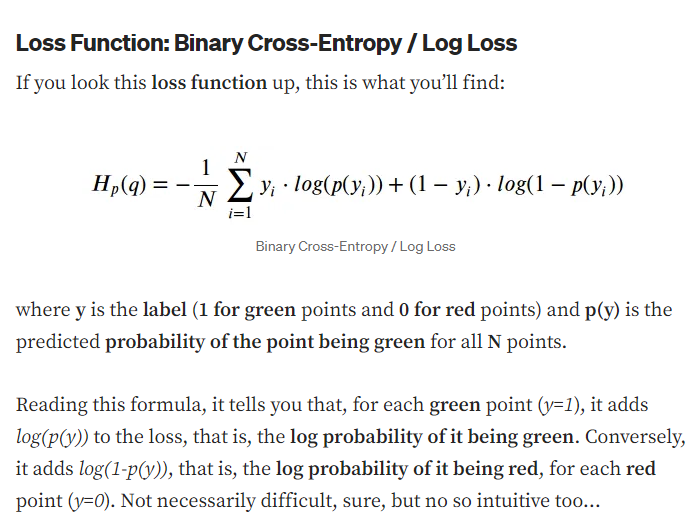

**Entropy In Data Science**
https://www.youtube.com/watch?app=desktop&v=YtebGVx-Fxw

In [24]:
# Caulculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train Model

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g sigmoid for binary classification and softmax for multiclass classificiation)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the argmax()

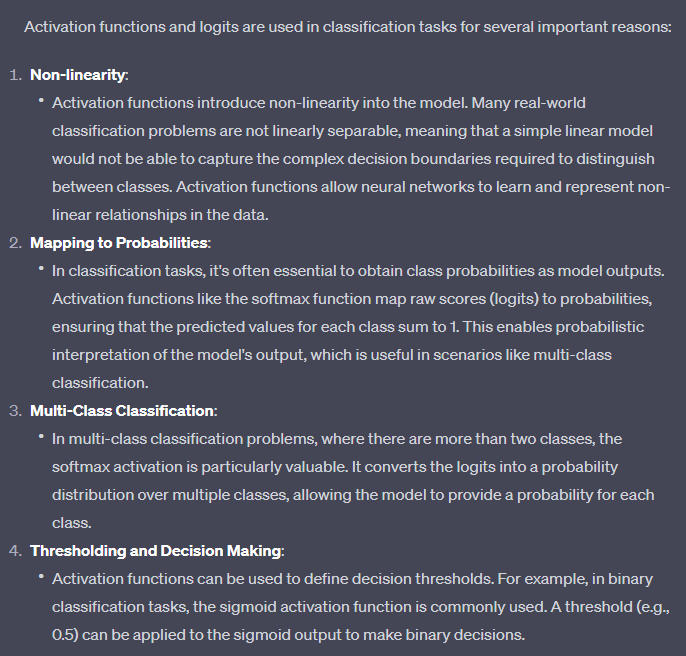

In [25]:
# View the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
print(y_logits)

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')


In [26]:
# Use the sigmoid activation function on our model logits to turn them into predictions probabilties
y_pred_probs = torch.sigmoid(y_logits)
print(y_pred_probs)

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')


In [27]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [28]:
print(y_test[:5])

tensor([1., 0., 1., 0., 1.])


### 3.2 Building a training and testing loop

In [29]:
torch.manual_seed(9)
torch.cuda.manual_seed(9)

# Set the number of epochs
epochs = 100

# Put data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ## Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, # Our loss method is BCEWithLogitLoss so we need to send logits to the loss function if we used BCELoss we have to give prediction probabilities to the loss
                 y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss Backward(backpropagation)
  loss.backward()

  # 5. Optimizer step(gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss/accurarcty
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  # Print out whats happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69796 | Acc: 51.88% | Test loss: 0.69440 | Test acc: 58.00%
Epoch: 10 | Loss: 0.69590 | Acc: 51.25% | Test loss: 0.69305 | Test acc: 53.00%
Epoch: 20 | Loss: 0.69490 | Acc: 51.62% | Test loss: 0.69254 | Test acc: 49.50%
Epoch: 30 | Loss: 0.69435 | Acc: 51.12% | Test loss: 0.69236 | Test acc: 49.50%
Epoch: 40 | Loss: 0.69401 | Acc: 50.88% | Test loss: 0.69232 | Test acc: 51.00%
Epoch: 50 | Loss: 0.69378 | Acc: 50.25% | Test loss: 0.69234 | Test acc: 50.00%
Epoch: 60 | Loss: 0.69362 | Acc: 50.00% | Test loss: 0.69239 | Test acc: 51.50%
Epoch: 70 | Loss: 0.69351 | Acc: 50.25% | Test loss: 0.69246 | Test acc: 51.00%
Epoch: 80 | Loss: 0.69342 | Acc: 49.88% | Test loss: 0.69254 | Test acc: 50.00%
Epoch: 90 | Loss: 0.69336 | Acc: 49.88% | Test loss: 0.69262 | Test acc: 53.00%


## 4. Make predictions and evaulate the model

In [30]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


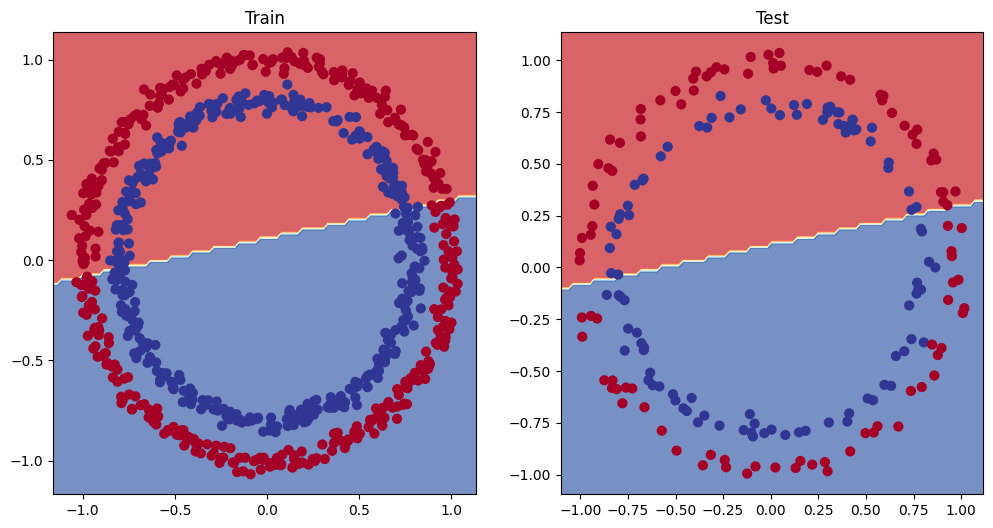

In [31]:
# Plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective rather than the data

In [32]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 20)
    self.layer_3 = nn.Linear(in_features = 20, out_features = 1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x))) # this and upper codes are the same

model_1 = CircleModelV1().to(device)
print(model_1)

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=1, bias=True)
)


In [33]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                              lr = 0.01)

In [34]:
torch.manual_seed(9)
torch.cuda.manual_seed(9)

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop
epochs = 1000
for epoch in range(epochs):
  # Train
  model_1.train()
  # Forward Pass
  y_logits2 = model_1(X_train).squeeze()
  y_preds2 = torch.round(torch.sigmoid(y_logits2))

  # Calculate the loss/acc
  loss = loss_fn(y_logits2, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss Backward (backpropagation)
  loss.backward()

  # Optimizer step(gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    # Calculate loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_preds)

  # Print out whats happening
  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69342 | Acc: 49.38% | Test loss: 0.69753 | Test acc: 46.00%
Epoch: 100 | Loss: 0.69328 | Acc: 49.38% | Test loss: 0.69698 | Test acc: 46.00%
Epoch: 200 | Loss: 0.69319 | Acc: 49.38% | Test loss: 0.69654 | Test acc: 46.00%
Epoch: 300 | Loss: 0.69313 | Acc: 49.38% | Test loss: 0.69619 | Test acc: 46.00%
Epoch: 400 | Loss: 0.69308 | Acc: 49.38% | Test loss: 0.69591 | Test acc: 46.00%
Epoch: 500 | Loss: 0.69305 | Acc: 49.38% | Test loss: 0.69568 | Test acc: 46.00%
Epoch: 600 | Loss: 0.69303 | Acc: 49.38% | Test loss: 0.69549 | Test acc: 46.50%
Epoch: 700 | Loss: 0.69302 | Acc: 49.38% | Test loss: 0.69535 | Test acc: 46.00%
Epoch: 800 | Loss: 0.69301 | Acc: 49.38% | Test loss: 0.69522 | Test acc: 45.50%
Epoch: 900 | Loss: 0.69300 | Acc: 49.38% | Test loss: 0.69512 | Test acc: 46.00%


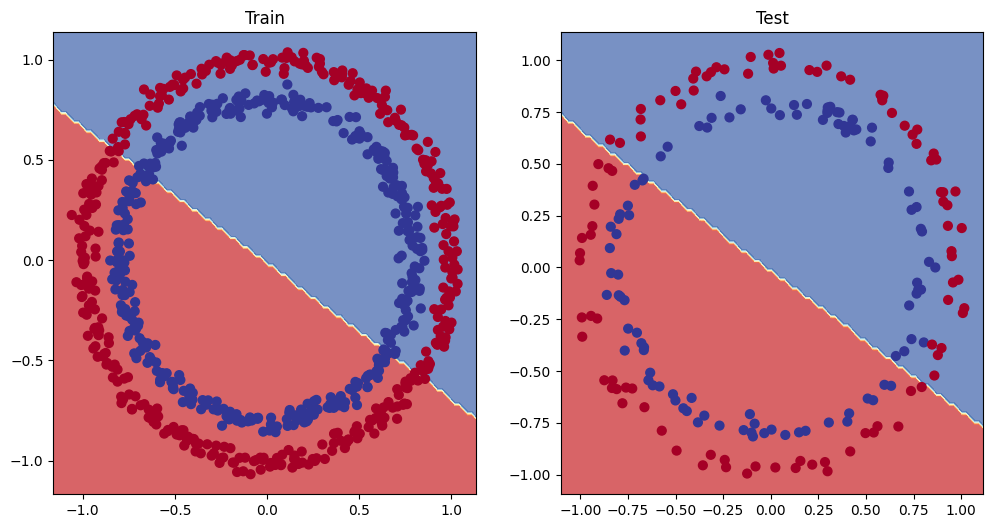

In [35]:
# Plot the decision boundary
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line


In [36]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create Data
X_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias # Linear Regression formula

In [37]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

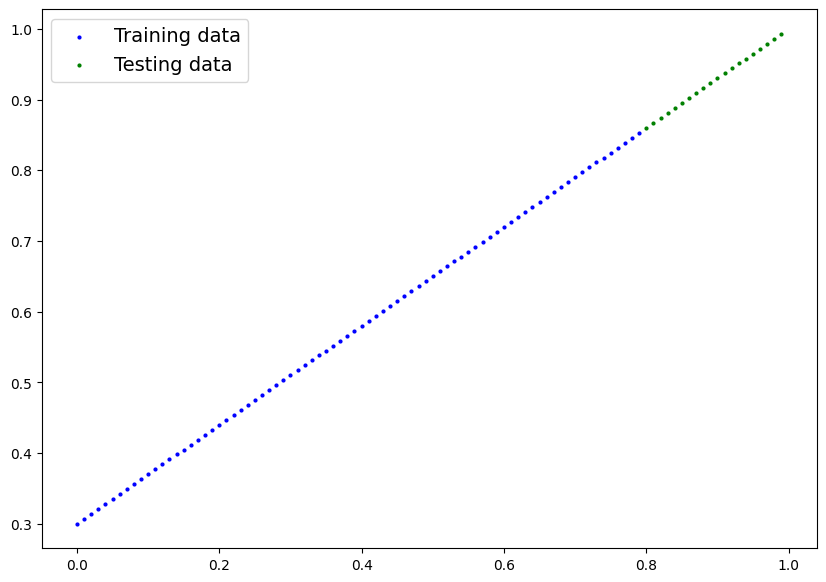

In [38]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

### 5.2 Adjusting model_1 to fit a straight line

In [39]:
# Same architecture as model_1 using nn.Sequential()
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr = 0.1)

In [41]:
# Train the model
torch.manual_seed(9)
torch.cuda.manual_seed(9)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### test
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print whats happening
  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")




Epoch: 0 | Loss: 0.61467 | Test loss: 0.70380
Epoch: 100 | Loss: 0.07575 | Test loss: 0.02491
Epoch: 200 | Loss: 0.06558 | Test loss: 0.01510
Epoch: 300 | Loss: 0.07377 | Test loss: 0.02215
Epoch: 400 | Loss: 0.05836 | Test loss: 0.01662
Epoch: 500 | Loss: 0.05368 | Test loss: 0.00860
Epoch: 600 | Loss: 0.04958 | Test loss: 0.01128
Epoch: 700 | Loss: 0.07163 | Test loss: 0.02313
Epoch: 800 | Loss: 0.05352 | Test loss: 0.00720
Epoch: 900 | Loss: 0.05064 | Test loss: 0.00573


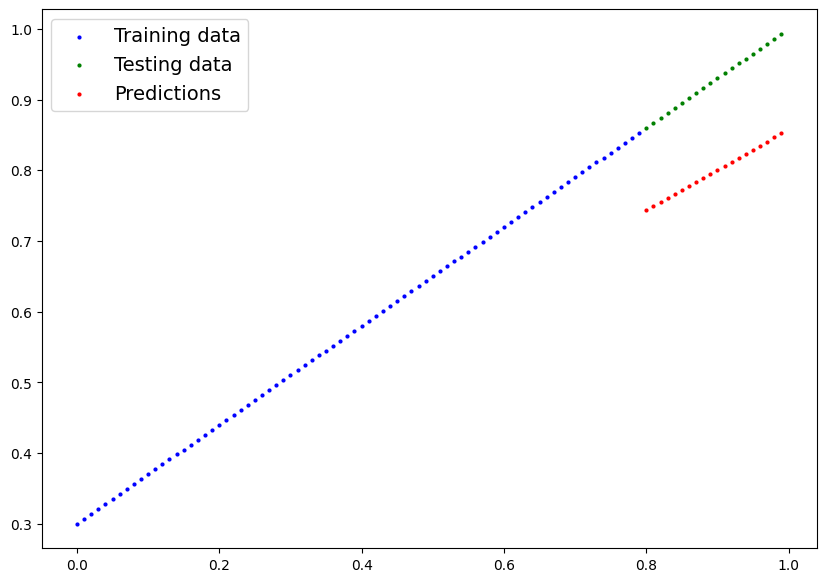

In [42]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 predictions = y_preds.cpu())

## 6. Non-Linearity

### 6.1 Recreating non-linear data (red and blue circles)

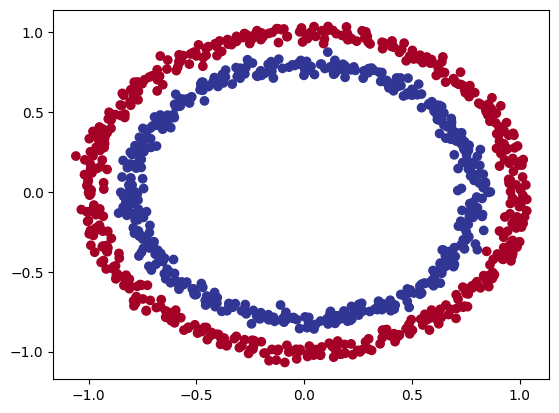

In [43]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu)

In [44]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

### 6.2 Building a model with non-linearity


In [45]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU() # relu is a nonlinar activation function

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [46]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr = 0.1)

In [47]:
# Random Seeds
torch.manual_seed(9)
torch.cuda.manual_seed(9)

# Put all datas to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 2000

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Test code
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                    y_pred = test_pred)

  # Print whats happening
  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69575 | Acc: 50.00% | Test loss: 0.69485 | Test acc: 50.00%
Epoch: 100 | Loss: 0.69331 | Acc: 48.62% | Test loss: 0.69276 | Test acc: 53.00%
Epoch: 200 | Loss: 0.69258 | Acc: 51.75% | Test loss: 0.69247 | Test acc: 49.50%
Epoch: 300 | Loss: 0.69164 | Acc: 53.25% | Test loss: 0.69230 | Test acc: 52.00%
Epoch: 400 | Loss: 0.69033 | Acc: 57.00% | Test loss: 0.69209 | Test acc: 50.50%
Epoch: 500 | Loss: 0.68877 | Acc: 61.62% | Test loss: 0.69161 | Test acc: 59.50%
Epoch: 600 | Loss: 0.68654 | Acc: 59.62% | Test loss: 0.69063 | Test acc: 55.00%
Epoch: 700 | Loss: 0.68288 | Acc: 63.25% | Test loss: 0.68841 | Test acc: 60.00%
Epoch: 800 | Loss: 0.67880 | Acc: 65.25% | Test loss: 0.68548 | Test acc: 59.00%
Epoch: 900 | Loss: 0.67359 | Acc: 60.38% | Test loss: 0.68129 | Test acc: 54.50%
Epoch: 1000 | Loss: 0.66720 | Acc: 59.50% | Test loss: 0.67590 | Test acc: 54.50%
Epoch: 1100 | Loss: 0.65944 | Acc: 60.12% | Test loss: 0.66957 | Test acc: 56.00%
Epoch: 1200 | Loss: 0.64996 

## 6.4 Evaulating a model trained with non-linear activation functions


In [48]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

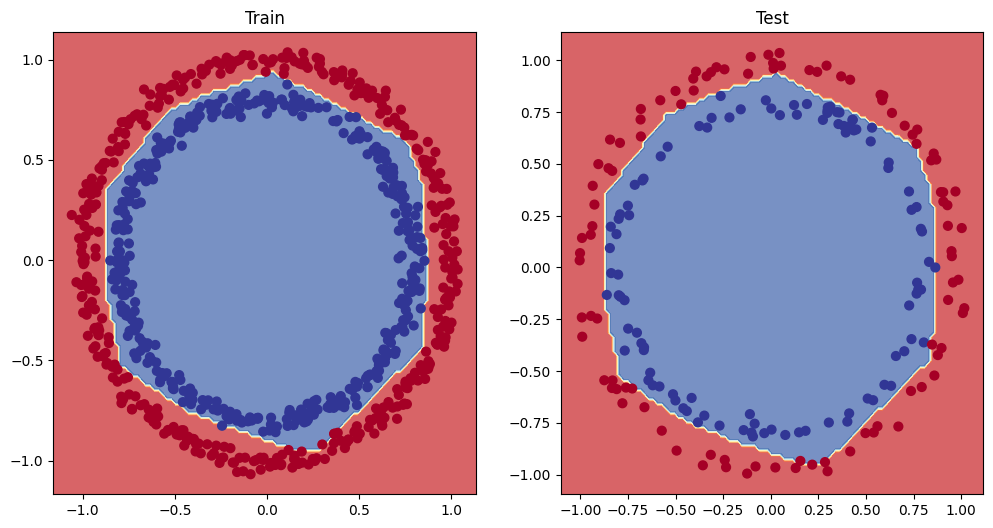

In [49]:
# Plot decision boundaries
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### 7. Replicating non-linear activation functions

In [50]:
# Create a tensor
A = torch.arange(-100, 100, 1, dtype = torch.float32)

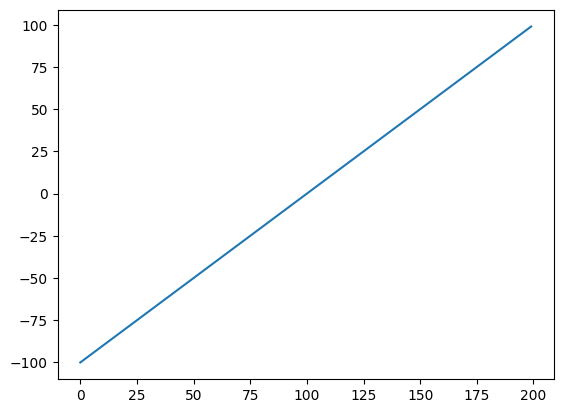

In [51]:
# Visualize the tensor
plt.plot(A)

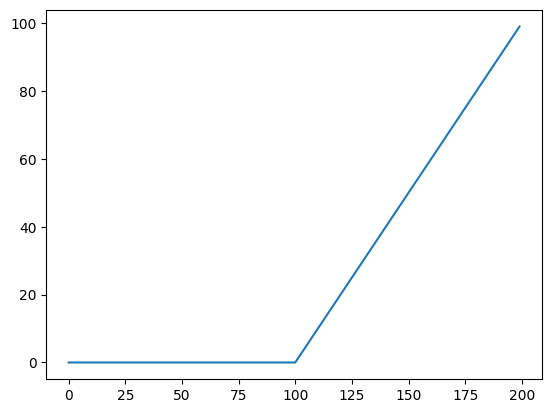

In [52]:
plt.plot(torch.relu(A))

In [53]:
def relu(x: torch.tensor) -> torch.tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
        12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67.,
        68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 7

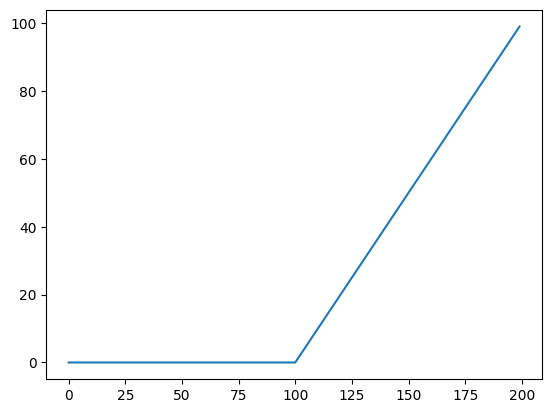

In [54]:
# Plot ReLU activation function
plt.plot(relu(A))

In [55]:
def sigmoid(x : torch.tensor) -> torch.tensor:
  return (1/ 1 + torch.exp(-x))

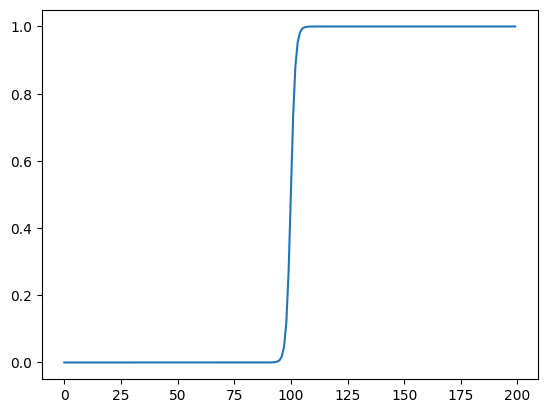

In [56]:
plt.plot(torch.sigmoid(A))

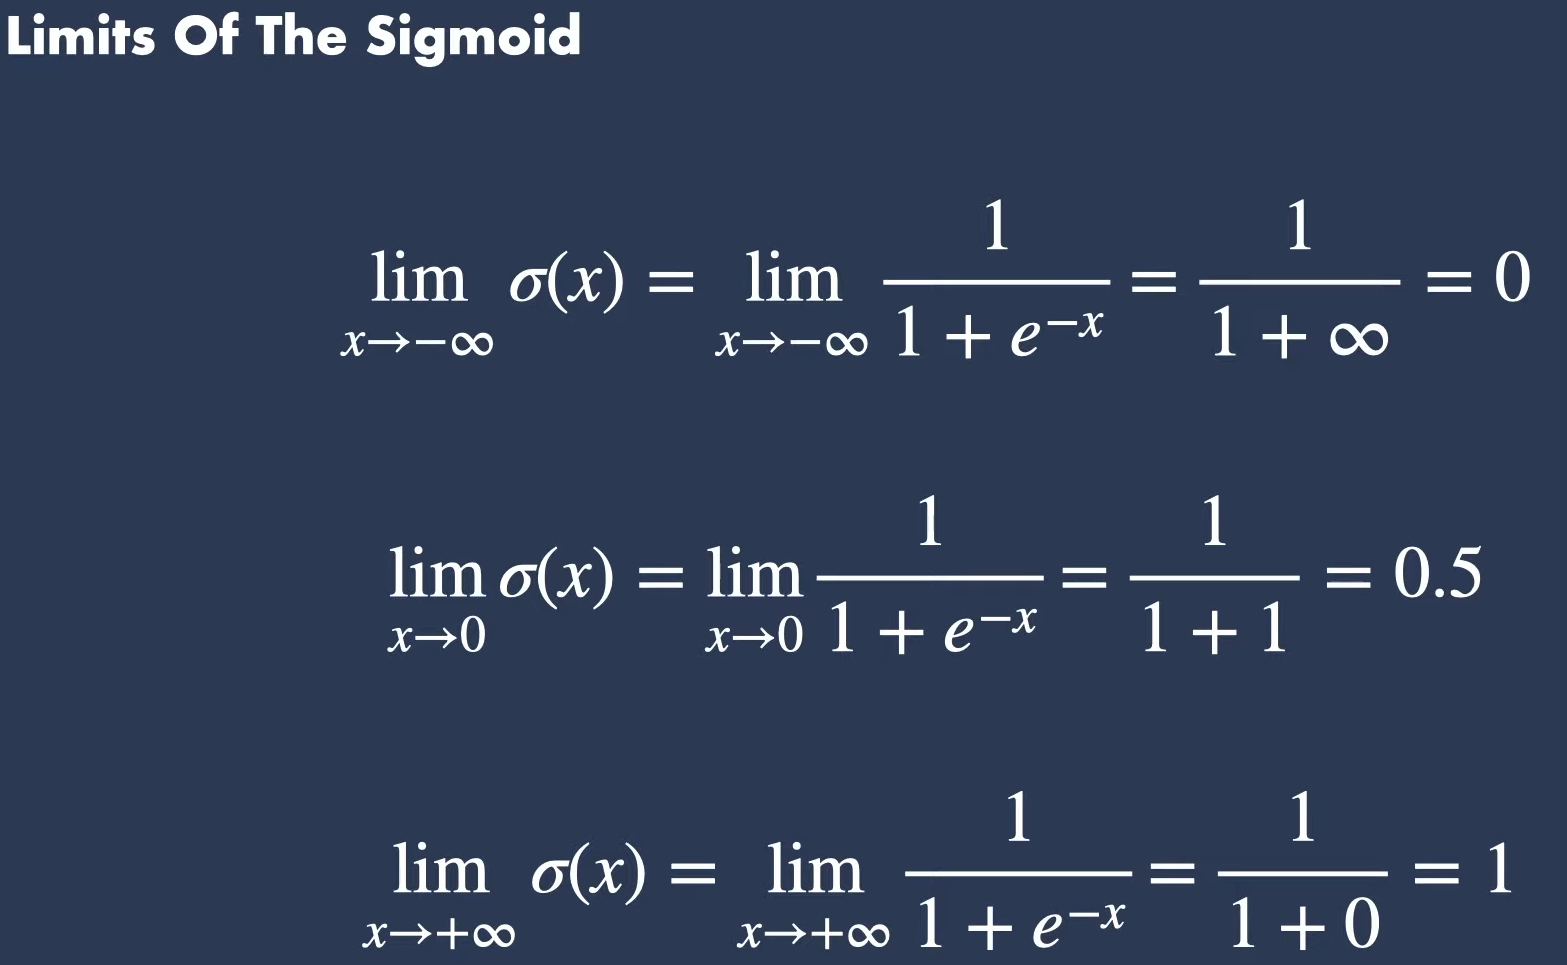

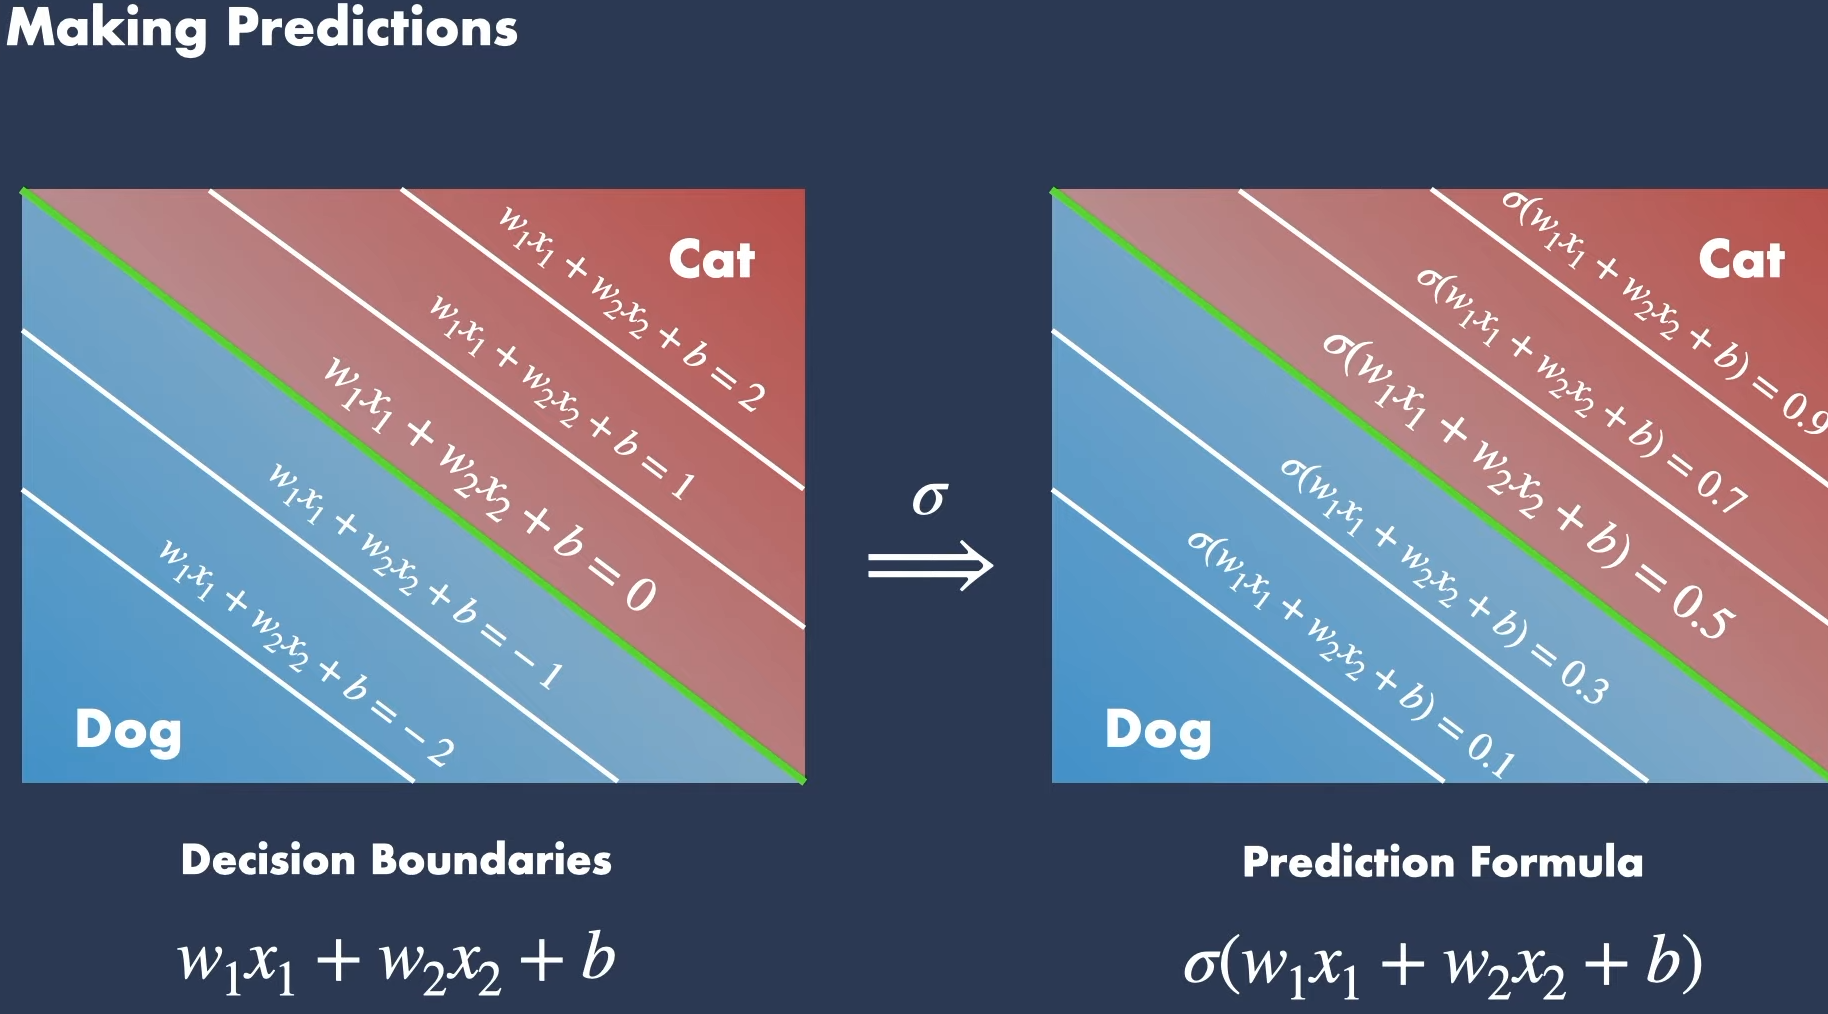

### 8.1 Multi-Class classification problem

### 8.1 Creating a toy multi class dataset

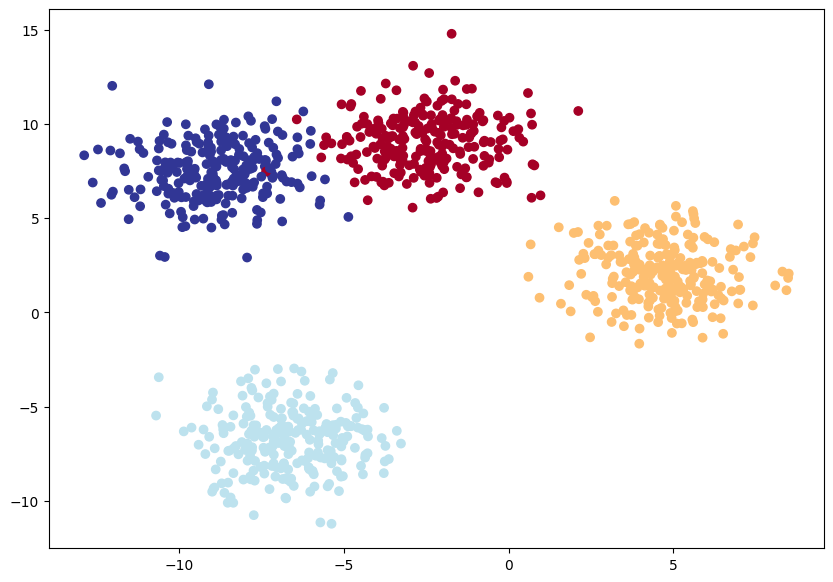

In [57]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyper paramaeters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multiclass data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5, #give the clusters a little shake up
                            random_state = RANDOM_SEED)

# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split into training and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

# Plot Data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, cmap = plt.cm.RdYlBu)


### 8.2 Building a multi class classification model in PyTorch

In [58]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """Initializes multi class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance
model_4 = BlobModel(input_features = 2, output_features = 4).to(device)

In [59]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_4.parameters(),
                            lr = 0.01)

In [60]:
# Random Seeds
torch.manual_seed(9)
torch.cuda.manual_seed(9)

# Put all datas to the device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

epochs = 100

for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_blob_train)

  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Test code
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                          y_pred = test_pred)

  # Print whats happening
  if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.16986 | Acc: 3.50% | Test loss: 1.96537 | Test acc: 15.00%
Epoch: 10 | Loss: 1.06759 | Acc: 49.75% | Test loss: 0.99641 | Test acc: 51.00%
Epoch: 20 | Loss: 0.72171 | Acc: 84.75% | Test loss: 0.67776 | Test acc: 90.00%
Epoch: 30 | Loss: 0.54068 | Acc: 96.25% | Test loss: 0.51360 | Test acc: 98.50%
Epoch: 40 | Loss: 0.42750 | Acc: 98.38% | Test loss: 0.41083 | Test acc: 98.50%
Epoch: 50 | Loss: 0.35110 | Acc: 98.88% | Test loss: 0.34033 | Test acc: 99.00%
Epoch: 60 | Loss: 0.29660 | Acc: 99.00% | Test loss: 0.28908 | Test acc: 99.00%
Epoch: 70 | Loss: 0.25602 | Acc: 99.25% | Test loss: 0.25026 | Test acc: 99.00%
Epoch: 80 | Loss: 0.22476 | Acc: 99.25% | Test loss: 0.21993 | Test acc: 99.50%
Epoch: 90 | Loss: 0.20003 | Acc: 99.25% | Test loss: 0.19566 | Test acc: 99.00%


### 8.6 Making and evaluating predictiosn with a PyTorch multi-class model

In [61]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ 1.8834,  3.5952, -3.6001, -2.1797],
        [ 0.3661, -5.6824, -1.7090,  1.9335],
        [-2.2376, -4.9982,  5.8266,  2.3490],
        [ 1.0839,  2.7350, -1.5626, -1.6239],
        [ 2.2370,  0.2629, -5.4606, -0.9402],
        [ 0.2825, -6.9457, -1.7992,  2.4610],
        [-2.0924, -3.6582,  5.7627,  1.7745],
        [ 1.6980, -1.2865, -4.3373, -0.1777],
        [-2.6319, -7.1566,  6.3835,  3.3168],
        [ 1.8652, -0.7060, -4.6601, -0.4542]], device='cuda:0')

In [62]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[1.5244e-01, 8.4430e-01, 6.3330e-04, 2.6212e-03],
        [1.6887e-01, 3.9878e-04, 2.1200e-02, 8.0953e-01],
        [3.0508e-04, 1.9296e-05, 9.6973e-01, 2.9945e-02],
        [1.5747e-01, 8.2086e-01, 1.1165e-02, 1.0501e-02],
        [8.4671e-01, 1.1759e-01, 3.8432e-04, 3.5308e-02],
        [1.0042e-01, 7.2885e-05, 1.2524e-02, 8.8698e-01],
        [3.8054e-04, 7.9506e-05, 9.8135e-01, 1.8187e-02],
        [8.2904e-01, 4.1921e-02, 1.9837e-03, 1.2706e-01],
        [1.1610e-04, 1.2583e-06, 9.5538e-01, 4.4500e-02],
        [8.5017e-01, 6.4987e-02, 1.2462e-03, 8.3599e-02]], device='cuda:0')

In [63]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [64]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

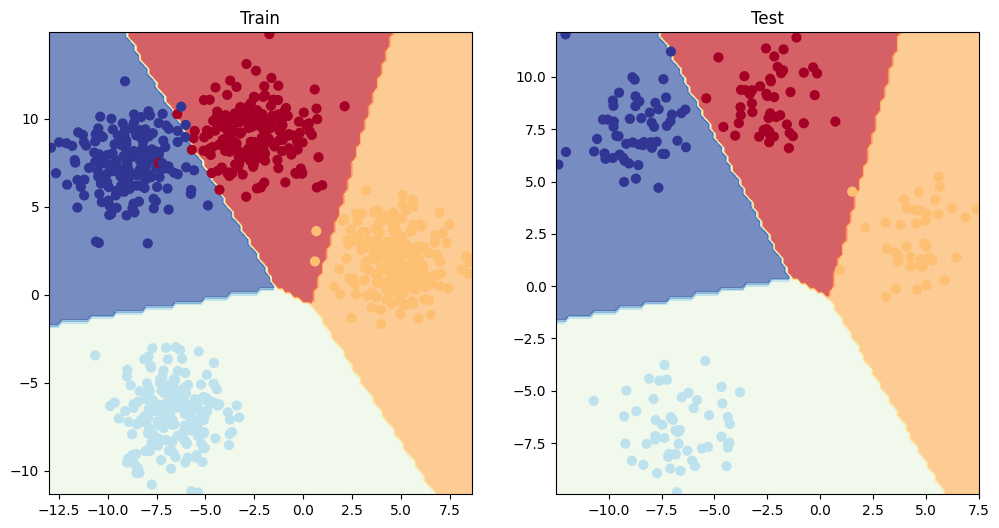

In [65]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 9. More classification metrics(for evaulate our classification modeL)

* Accuracy
* Precision
* Recall
* F1-Score
* Confusion matrix
* Classification report

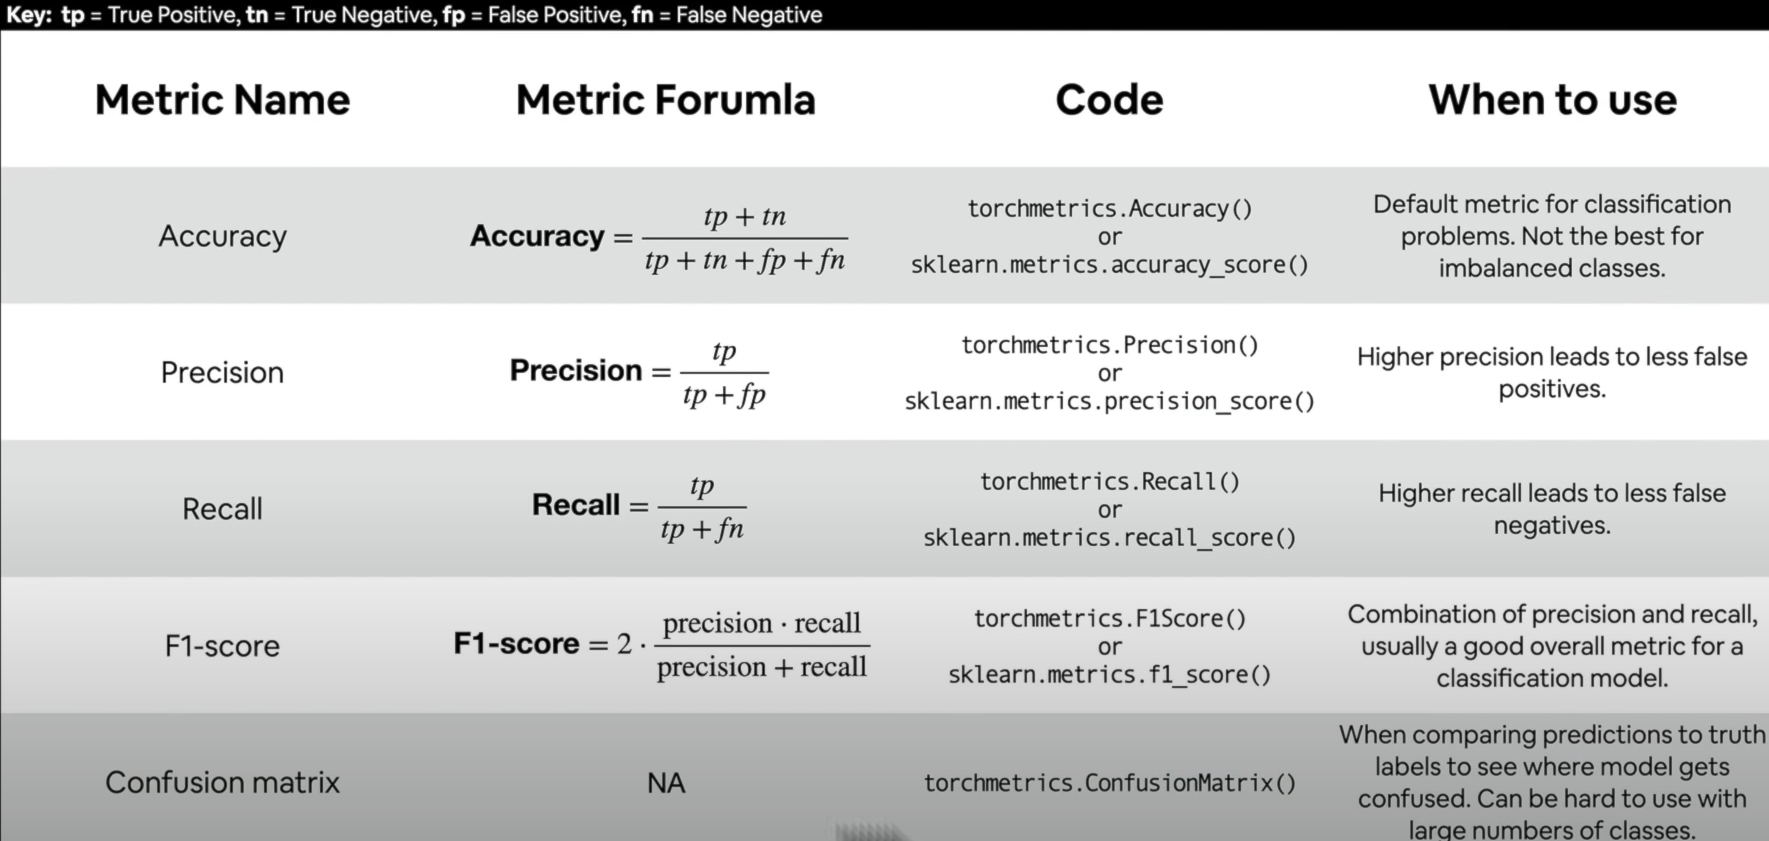

In [68]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_blob_test.cpu(), y_preds.cpu(), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98        49
     class 1       1.00      0.98      0.99        41
     class 2       1.00      1.00      1.00        53
     class 3       1.00      0.98      0.99        57

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [76]:
!pip install torchmetrics

In [85]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9900, device='cuda:0')